<a href="https://colab.research.google.com/github/ReyesGus/Hongos/blob/main/Hongos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Reyes Romero Gustavo** 

**1718110984**

**IDGS 91**

**Extracción de conocimientos de base de datos**


Importar librerias

In [1]:

import numpy as np
import pandas as pd
#librerias para crear graficos
import matplotlib.pyplot as plt
import seaborn as sns
#Asignar estilo a graficos de seaborns
sns.set_theme(style="darkgrid", palette="Spectral")

#libreria para convertir feautes a labels
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


Cargar datos del archivo 

In [3]:
df= pd.read_csv('mushrooms.csv')

Mostrar forma del dataframe


In [4]:
df.shape

(8124, 23)

Mostrar los primeros 5 registros

In [5]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


Mostrar ultimos 5 registros 

In [6]:
df.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,o,c,l


Mostrar la información del dataframe


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

Limpieza de los datos 

In [ ]:
Suma de los datos faltantes de cada columna


In [8]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

Verificar que no se dupliquen los datos 


In [9]:
df.duplicated().sum()

0

Clasificación de Hongos 

Conocer valores unicos de las columnas.


In [10]:
def uniqueData(dataframe, col):
  # Obtener todos los valores unicos en la columna
  lista_unica = df[col].unique()

  # Ordenar alfabeticamente y mostrar datos
  lista_unica.sort()
  print("Columna: ", col)
  print("No. columnas unicas: ", lista_unica.size)
  print("Valores unicos: ", lista_unica)

Mostrar valores unicos de cada columna


In [11]:
for i in (df):
  uniqueData(df, i)

Columna:  class
No. columnas unicas:  2
Valores unicos:  ['e' 'p']
Columna:  cap-shape
No. columnas unicas:  6
Valores unicos:  ['b' 'c' 'f' 'k' 's' 'x']
Columna:  cap-surface
No. columnas unicas:  4
Valores unicos:  ['f' 'g' 's' 'y']
Columna:  cap-color
No. columnas unicas:  10
Valores unicos:  ['b' 'c' 'e' 'g' 'n' 'p' 'r' 'u' 'w' 'y']
Columna:  bruises
No. columnas unicas:  2
Valores unicos:  ['f' 't']
Columna:  odor
No. columnas unicas:  9
Valores unicos:  ['a' 'c' 'f' 'l' 'm' 'n' 'p' 's' 'y']
Columna:  gill-attachment
No. columnas unicas:  2
Valores unicos:  ['a' 'f']
Columna:  gill-spacing
No. columnas unicas:  2
Valores unicos:  ['c' 'w']
Columna:  gill-size
No. columnas unicas:  2
Valores unicos:  ['b' 'n']
Columna:  gill-color
No. columnas unicas:  12
Valores unicos:  ['b' 'e' 'g' 'h' 'k' 'n' 'o' 'p' 'r' 'u' 'w' 'y']
Columna:  stalk-shape
No. columnas unicas:  2
Valores unicos:  ['e' 't']
Columna:  stalk-root
No. columnas unicas:  5
Valores unicos:  ['?' 'b' 'c' 'e' 'r']
Column

Columnas a categorias

Convertir columnas como tipo categorico 


In [12]:
columns = df.columns
df[columns] = df[columns].astype('category')

Verificar cambios


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   class                     8124 non-null   category
 1   cap-shape                 8124 non-null   category
 2   cap-surface               8124 non-null   category
 3   cap-color                 8124 non-null   category
 4   bruises                   8124 non-null   category
 5   odor                      8124 non-null   category
 6   gill-attachment           8124 non-null   category
 7   gill-spacing              8124 non-null   category
 8   gill-size                 8124 non-null   category
 9   gill-color                8124 non-null   category
 10  stalk-shape               8124 non-null   category
 11  stalk-root                8124 non-null   category
 12  stalk-surface-above-ring  8124 non-null   category
 13  stalk-surface-below-ring  8124 non-null   catego

Preparar categorias 

Transformar columnas categoricas a numericas


In [14]:
encoder = OrdinalEncoder()
encoder.fit(df[columns])
df[columns] = encoder.transform(df[columns])

Verificar cambios


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   class                     8124 non-null   float64
 1   cap-shape                 8124 non-null   float64
 2   cap-surface               8124 non-null   float64
 3   cap-color                 8124 non-null   float64
 4   bruises                   8124 non-null   float64
 5   odor                      8124 non-null   float64
 6   gill-attachment           8124 non-null   float64
 7   gill-spacing              8124 non-null   float64
 8   gill-size                 8124 non-null   float64
 9   gill-color                8124 non-null   float64
 10  stalk-shape               8124 non-null   float64
 11  stalk-root                8124 non-null   float64
 12  stalk-surface-above-ring  8124 non-null   float64
 13  stalk-surface-below-ring  8124 non-null   float64
 14  stalk-co

Primeros 5 registros


In [16]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1.0,5.0,2.0,4.0,1.0,6.0,1.0,0.0,1.0,4.0,0.0,3.0,2.0,2.0,7.0,7.0,0.0,2.0,1.0,4.0,2.0,3.0,5.0
1,0.0,5.0,2.0,9.0,1.0,0.0,1.0,0.0,0.0,4.0,0.0,2.0,2.0,2.0,7.0,7.0,0.0,2.0,1.0,4.0,3.0,2.0,1.0
2,0.0,0.0,2.0,8.0,1.0,3.0,1.0,0.0,0.0,5.0,0.0,2.0,2.0,2.0,7.0,7.0,0.0,2.0,1.0,4.0,3.0,2.0,3.0
3,1.0,5.0,3.0,8.0,1.0,6.0,1.0,0.0,1.0,5.0,0.0,3.0,2.0,2.0,7.0,7.0,0.0,2.0,1.0,4.0,2.0,3.0,5.0
4,0.0,5.0,2.0,3.0,0.0,5.0,1.0,1.0,0.0,4.0,1.0,3.0,2.0,2.0,7.0,7.0,0.0,2.0,1.0,0.0,3.0,0.0,1.0


Mostrar valores unicos de cada columna


In [17]:
i = 0
for i in (df):
  uniqueData(df, i)

Columna:  class
No. columnas unicas:  2
Valores unicos:  [0. 1.]
Columna:  cap-shape
No. columnas unicas:  6
Valores unicos:  [0. 1. 2. 3. 4. 5.]
Columna:  cap-surface
No. columnas unicas:  4
Valores unicos:  [0. 1. 2. 3.]
Columna:  cap-color
No. columnas unicas:  10
Valores unicos:  [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
Columna:  bruises
No. columnas unicas:  2
Valores unicos:  [0. 1.]
Columna:  odor
No. columnas unicas:  9
Valores unicos:  [0. 1. 2. 3. 4. 5. 6. 7. 8.]
Columna:  gill-attachment
No. columnas unicas:  2
Valores unicos:  [0. 1.]
Columna:  gill-spacing
No. columnas unicas:  2
Valores unicos:  [0. 1.]
Columna:  gill-size
No. columnas unicas:  2
Valores unicos:  [0. 1.]
Columna:  gill-color
No. columnas unicas:  12
Valores unicos:  [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11.]
Columna:  stalk-shape
No. columnas unicas:  2
Valores unicos:  [0. 1.]
Columna:  stalk-root
No. columnas unicas:  5
Valores unicos:  [0. 1. 2. 3. 4.]
Columna:  stalk-surface-above-ring
No. columnas unic

Valores estadisticos

 Mostrar los valores estadisticos de cada columna



In [18]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,0.567208,1.109798,1.575086,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,0.495493,1.061106,0.621459,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,1.000000,1.000000,2.000000,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,1.000000,1.000000,2.000000,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,1.000000,4.000000,3.000000,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


Correlación

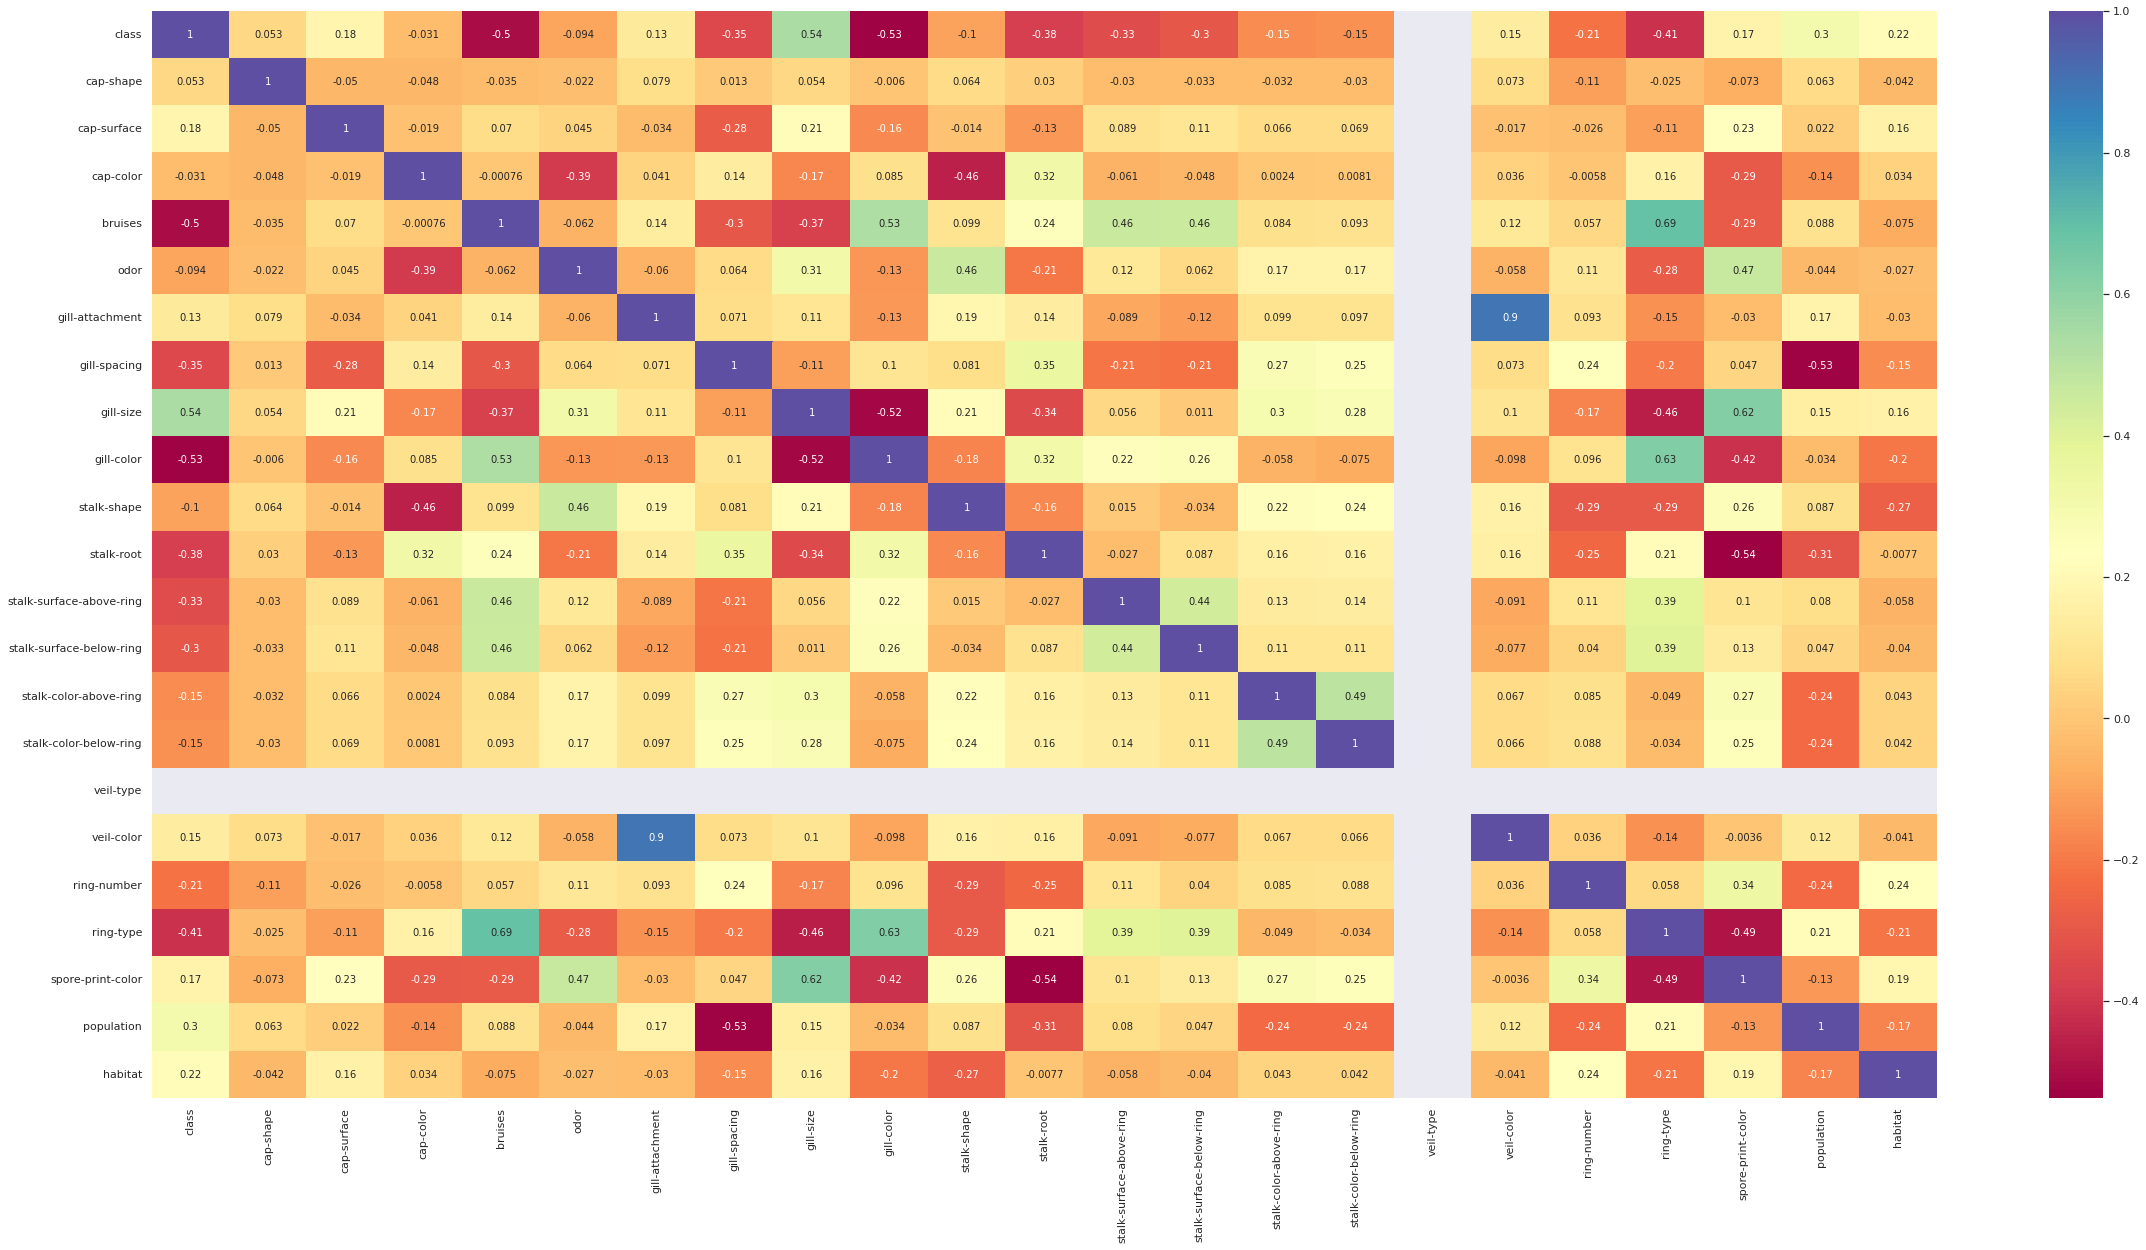

In [19]:
plt.figure(figsize=(40,20))
sns.heatmap(df.corr(), cmap="Spectral", annot=True)
plt.show()


Correlacion con columna class

In [20]:
y = df['class']
y

0       1.0
1       0.0
2       0.0
3       1.0
4       0.0
       ... 
8119    0.0
8120    0.0
8121    0.0
8122    1.0
8123    0.0
Name: class, Length: 8124, dtype: float64

Ordenar de manera descendente los valores de corelación


In [21]:
corr = df.corr()

corr['class'].sort_values(ascending=False)

class                       1.000000
gill-size                   0.540024
population                  0.298686
habitat                     0.217179
cap-surface                 0.178446
spore-print-color           0.171961
veil-color                  0.145142
gill-attachment             0.129200
cap-shape                   0.052951
cap-color                  -0.031384
odor                       -0.093552
stalk-shape                -0.102019
stalk-color-below-ring     -0.146730
stalk-color-above-ring     -0.154003
ring-number                -0.214366
stalk-surface-below-ring   -0.298801
stalk-surface-above-ring   -0.334593
gill-spacing               -0.348387
stalk-root                 -0.379361
ring-type                  -0.411771
bruises                    -0.501530
gill-color                 -0.530566
veil-type                        NaN
Name: class, dtype: float64

Modelo de clasificación

In [22]:
x = df[['gill-size', 'population', 'habitat', 'cap-surface', 'spore-print-color', 'veil-color', 'cap-shape' ]]
y = df['class']

Configurar Modelo de Clasificación

In [23]:
model = KNeighborsClassifier(n_neighbors=5)


Dividir el dataframe en test y train

In [24]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=1234)
print(x_train.count())
print(x_test.count())

gill-size            6499
population           6499
habitat              6499
cap-surface          6499
spore-print-color    6499
veil-color           6499
cap-shape            6499
dtype: int64
gill-size            1625
population           1625
habitat              1625
cap-surface          1625
spore-print-color    1625
veil-color           1625
cap-shape            1625
dtype: int64



Entrenar modelo

In [25]:
model.fit(x_train,y_train)
print (model)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')



Predecir clases

In [26]:
y_hat = model.predict(x_test)

In [27]:

print(accuracy_score(y_test,y_hat))
print(classification_report(y_test,y_hat))
print(confusion_matrix(y_test,y_hat))

0.9846153846153847
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98       817
         1.0       0.98      0.99      0.98       808

    accuracy                           0.98      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625

[[800  17]
 [  8 800]]



Conclusión

El saber manejar los datos de una forma correcta nos ayudara en muchos asepctos uno de ellos es el entedner de una mejor manera los datos para su manipulacion en un futuro y así tomar una desiscion que lleve al éxito en cualquier trabajo. 